## Explanation

**Context**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


**Inspiration** 

What types of machine learning models perform best on this dataset?

Which features are most indicative of a poisonous mushroom?



**About this file**

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

mushRoom Dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download 


In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris 
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDClassifier 

## Data Import

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amirshq/Machine-Learning-datasets/main/mushrooms.csv')
dataset_original = dataset
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Data Pre-processing

### Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
# Encode the labels for all Dataset 
for col in dataset.columns:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

In [6]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [7]:
#sns.pairplot(dataset)

## Data Visualization

Text(0.5, 1.0, 'stalk color below ring Vs Habitat')

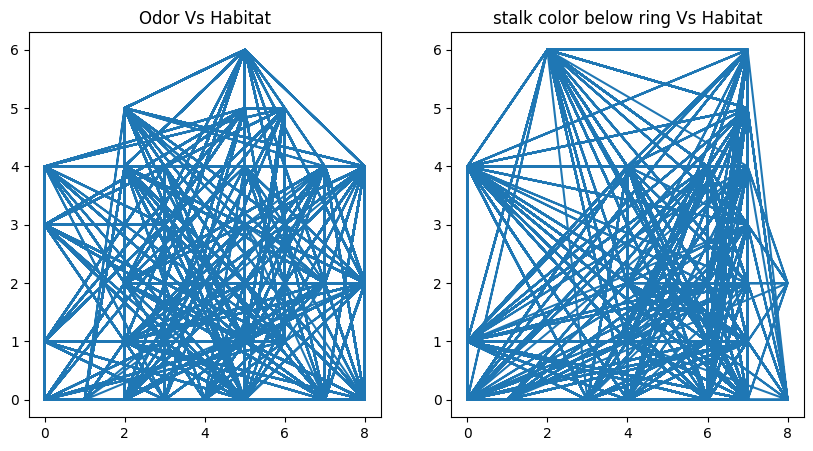

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(dataset['odor'],dataset['habitat'])
plt.title('Odor Vs Habitat')

plt.subplot(122)
plt.plot(dataset['stalk-color-below-ring'],dataset['habitat'])
plt.title('stalk color below ring Vs Habitat')


## Data Cleaning

In [9]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler

dataset_scaled = pd.DataFrame(MinMaxScaler().fit_transform(dataset))
dataset_scaled

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8120,0.0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.625,0.625,0.0,0.000000,0.5,1.0,0.000,0.8,0.333333
8121,0.0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,...,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2,0.333333
8122,1.0,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,...,0.333333,0.875,0.875,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


## Train Test Split for Regression

In [11]:
x = dataset_scaled.iloc[:,0:22]
x

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6
1,0.0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4
2,0.0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4
3,1.0,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6
4,0.0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.6,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2
8120,0.0,1.0,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,1.000000,...,0.666667,0.666667,0.625,0.625,0.0,0.000000,0.5,1.0,0.000,0.8
8121,0.0,0.4,0.666667,0.444444,0.0,0.625,0.0,0.0,0.0,0.454545,...,0.666667,0.666667,0.625,0.625,0.0,0.333333,0.5,1.0,0.000,0.2
8122,1.0,0.6,1.000000,0.444444,0.0,1.000,1.0,0.0,1.0,0.000000,...,0.666667,0.333333,0.875,0.875,0.0,0.666667,0.5,0.0,0.875,0.8


In [12]:
y = dataset_scaled.iloc[:,22:23]
y

,22
0,0.833333
1,0.166667
2,0.500000
3,0.833333
4,0.166667
...,...
8119,0.333333
8120,0.333333
8121,0.333333
8122,0.333333


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from numpy.random.mtrand import random_sample
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

# Regression Models

## Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(x_train , y_train)

LinearRegression()

In [16]:
y_pred = lin_reg_model.predict(x_test)

In [51]:
x_test.shape

(2438, 22)

In [52]:
x_train.shape

(5686, 22)

In [53]:
y_pred.shape

(2438,)

In [54]:
y_test.shape

(2438, 1)

In [55]:
y_train.shape

(5686, 1)

In [17]:
from sklearn.metrics import mean_squared_error
print(f'The Error is : {mean_squared_error(y_test, y_pred)*100:.2f}%')

The Error is : 5.38%


### Model Evaluation

#### K-fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg_model, x,y , cv = 4, scoring = 'neg_mean_squared_error')

In [19]:
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([0.35425383, 0.18667051, 0.44340293, 0.25842304])

## Support Vector Machine Regression (SVR)

In [20]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C= 100 , epsilon=0.1)
svr_model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, kernel='linear')

In [21]:
y_pred = svr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'The Error is : {mse*100:.2f}%')

The Error is : 6.17%


### Model Evaluaion

#### K-Fold Cross Validation

In [22]:
scores_svr = cross_val_score(svr_model, x,y, cv=4, scoring = 'neg_mean_squared_error')
svr_rmse_scores = np.sqrt(-scores_svr)
svr_rmse_scores

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

array([0.27904306, 0.16546149, 0.54846512, 0.27966306])

### Hyper Parameter Tuning (Grid Search)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel':['linear'], 'degree':[2,3,5], 'gamma':['scale']},
    {'kernel':['rbf'], 'degree':[4,6], 'gamma':['auto']},]

grid_search = GridSearchCV(svr_model,param_grid,cv=3, 
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

GridSearchCV(cv=3, estimator=SVR(C=100, kernel='linear'),
             param_grid=[{'degree': [2, 3, 5], 'gamma': ['scale'],
                          'kernel': ['linear']},
                         {'degree': [4, 6], 'gamma': ['auto'],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}

In [25]:
grid_search.best_estimator_

SVR(C=100, degree=4, gamma='auto')

In [26]:
#Errors with different params in Grid Search
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
  print(f'{np.sqrt(-mean_score)*100:.2f}%',params)

23.56% {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
23.56% {'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
23.56% {'degree': 5, 'gamma': 'scale', 'kernel': 'linear'}
22.28% {'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
22.28% {'degree': 6, 'gamma': 'auto', 'kernel': 'rbf'}


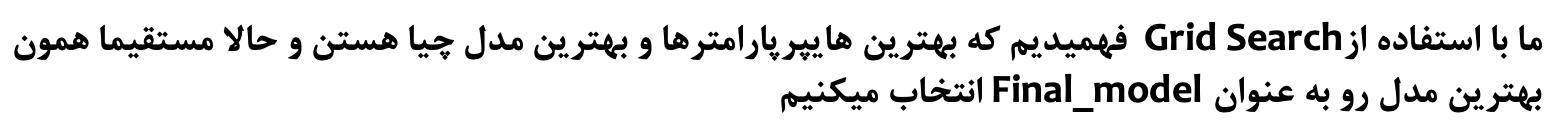

In [27]:
final_model_svr = grid_search.best_estimator_

final_prediction_svr = final_model_svr.predict(x_test)

final_mse_svr = mean_squared_error(final_prediction_svr , y_test)
print(f'Error for the Best params in SVR model using Grid Search: {np.sqrt(final_mse_svr)*100:.2f}%')


Error for the Best params in SVR model using Grid Search: 23.26%


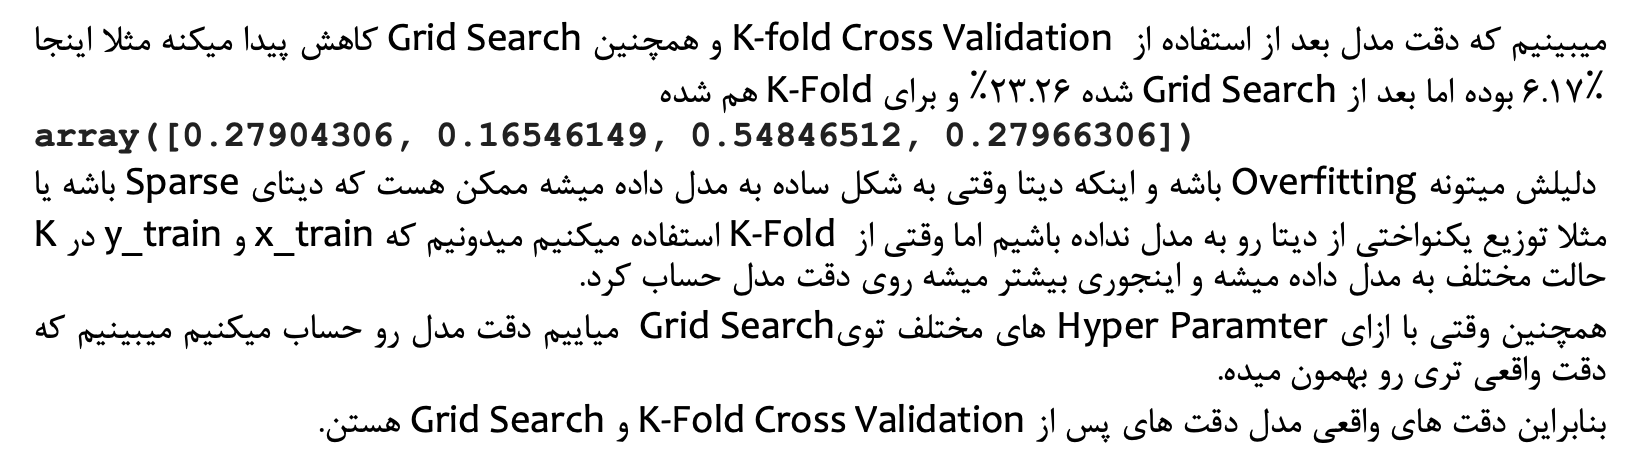

**ChatGPT:**

**If the model's error (such as Mean Squared Error or Root Mean Squared Error) increases after using k-fold cross-validation, it could indicate that the model is overfitting on the training data.**

**Overfitting occurs when a model is too complex and tries to fit the noise or random fluctuations in the training data, rather than the underlying pattern. This leads to a low error on the training data but a high error on the testing data or new data.**

**K-fold cross-validation helps to mitigate the risk of overfitting by partitioning the data into k folds and using each fold as the testing data while using the remaining k-1 folds for training the model. This allows the model to be trained on different subsets of the data and tested on different subsets, providing a more accurate estimate of the model's performance.**

**However, if the model is overfitting on the training data, it will still perform poorly on the testing data even with k-fold cross-validation. In fact, the model may perform worse with cross-validation because it is being trained on even smaller subsets of the data and therefore has less information to learn from.**

**To address overfitting, you can try reducing the complexity of the model (e.g., using fewer features, adding regularization), increasing the amount of training data, or using a different model altogether. Additionally, you can use more advanced techniques such as ensemble methods or deep learning to improve the model's generalization performance.**

# Classification Models

## Train Test Split for Classification

**The Classification methods cannot work with the Normalize Data, So we are going to use Intiger Data for Classification. So we use the Dataset DataFrame.**

In [28]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [29]:
x_int = dataset.iloc[:,0:22]
x_int

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,2,1,4,2,3
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,2,1,4,3,2
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,2,1,4,3,2
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,2,1,4,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,1,4,0,1
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,0,1,4,0,4
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,0,1,1,4,0,1
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,0,2,1,0,7,4


In [30]:
y_int = dataset.iloc[:,22:23]
y_int

,habitat
0,5
1,1
2,3
3,5
4,1
...,...
8119,2
8120,2
8121,2
8122,2


In [31]:
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_int, y_int , test_size = 0.3 , random_state=42)

In [57]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_pred.shape)

(8124, 22)
(8124, 1)
(5686, 22)
(2438, 22)
(5686, 1)
(2438, 1)
(2438,)


In [59]:
print(x_int.shape)
print(y_int.shape)
print(x_train_clf.shape)
print(x_test_clf.shape)
print(y_train_clf.shape)
print(y_test_clf.shape)
print(y_pred_clf2.shape)

(8124, 22)
(8124, 1)
(5686, 22)
(2438, 22)
(5686, 1)
(2438, 1)
(2438,)


## Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_clf,y_train_clf)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## K-Fold Cross Validation

In [33]:
cross_val_score(LR, x_int, y_int, cv =3)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

array([0.63626292, 0.64327917, 0.17282127])

## Evaluation metrics 

### Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
y_pred_clf = LR.predict(x_test_clf)

In [68]:
conf_mx = confusion_matrix(y_test_clf, y_pred_clf)
conf_mx

array([[709,  66,  94,   0,  64,   0,   0],
       [ 49, 464,   0,  58,  42,  47,   0],
       [ 69,   6, 128,   0,  27,   0,   0],
       [  0,  36,   0,  55,   0,   0,   0],
       [110,  77,  86,   2,  78,   0,   0],
       [  4,  45,   0,   0,   0,  75,   0],
       [  0,   0,   0,   0,   0,   0,  47]])

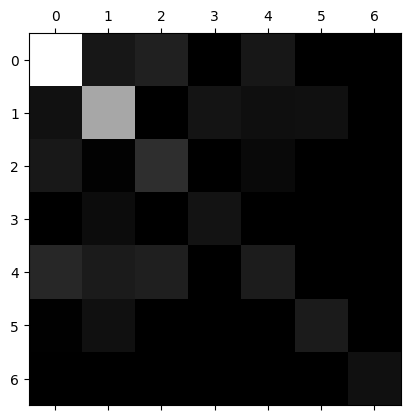

In [71]:
plt.matshow(conf_mx, cmap ='gray')

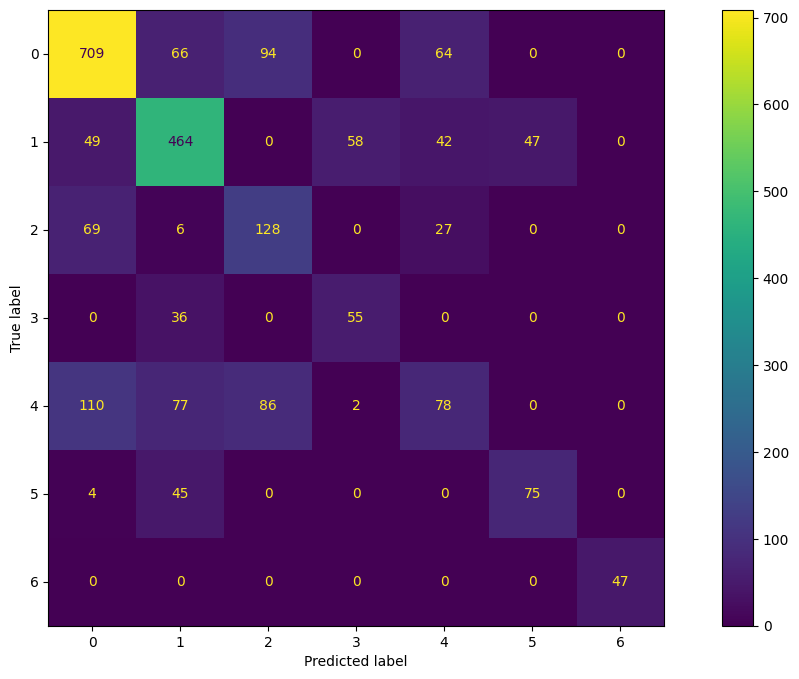

In [93]:
from matplotlib import rcParams
from sklearn.metrics import ConfusionMatrixDisplay
rcParams['figure.figsize'] = 15,8
disp = ConfusionMatrixDisplay(conf_mx)
disp.plot()